#### 1. Genere una muestra de casos (1 punto). Para ello debes considerar:

- Utilice los últimos 4 dígitos de su rut como semilla pseudoaleatoria.
- Seleccione el 50% de los casos.
- Cada base generada debe contener los siguientes elementos:
    - El índice de desarrollo humano (undp_hdi).
    - El nombre del país (ccodealp).
    - La región a la que pertenece (ht_region).
    - El PIB per cápita. (gle_cgdpc).
    - El total de la población (imf_pop).
- Si su apellido está entre la A y la M, escoja las siguientes variables del módulo Educación:
    - **ffp_hf**     :  Human Flight and Brain Drain.
    - **wef_qes**    :  Quality of the educational system.
    - **wdi_expedu** :  Government expenditure on education, total (% of GDP).
    - **wdi_ners**   :  School enrollment, secondary (% net).

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def calidad_datos(data):
    tipos = pd.DataFrame({'tipo': data.dtypes},index=data.columns)
    na = pd.DataFrame({'nulos': data.isna().sum()}, index=data.columns)
    na_prop = pd.DataFrame({'porc_nulos':data.isna().sum()/data.shape[0]}, index=data.columns)
    ceros = pd.DataFrame({'ceros':[data.loc[data[col]==0,col].shape[0] for col in data.columns]}, index= data.columns)
    ceros_prop = pd.DataFrame({'porc_ceros':[data.loc[data[col]==0,col].shape[0]/data.shape[0] for col in data.columns]}, index= data.columns)
    summary = data.describe(include='all').T

    summary['limit_inf'] = summary['mean'] - summary['std']*1.5
    summary['limit_sup'] = summary['mean'] + summary['std']*1.5
    
    summary['outliers'] = data.apply(lambda x: sum(np.where((x<summary['limit_inf'][x.name]) | (x>summary['limit_sup'][x.name]),1 ,0)) if x.name in summary['limit_inf'].dropna().index else 0)
    return pd.concat([tipos, na, na_prop, ceros, ceros_prop, summary], axis=1).sort_values('tipo')

plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] =(4,3)
plt.rcParams["figure.dpi"] = 200

df = pd.read_csv('qog_std_cs_jan18.csv')
df_frac=df.sample(frac=0.5, random_state=9886)

cods=[1,2,3,4,5,6,7,8,9,10]

nombres=nombres = ['EastEurope', 'LatAm', 'NorthAfrica','SubSaharian', 'WesternDem',
            'EastAsia','SouthEastAsia','SouthAsia', 'Pacific', 'Caribbean' ]

# Mi apellido es Chávez
columnas_am = ['cname', 'undp_hdi','ccodealp', 'ht_region', 'gle_cgdpc', 'imf_pop',
               'ffp_hf', 'wef_qes', 'wdi_expedu','wdi_ners']

mis_columnas = ['ffp_hf', 'wef_qes', 'wdi_expedu','wdi_ners']               

df_frac = df_frac.loc[:, columnas_am]

In [2]:
print (df_frac.shape)
df_frac.head()

(97, 10)


,cname,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners
179,Tuvalu,NaN,TUV,9,3174.05,0.011,NaN,NaN,NaN,69.804977
63,Gambia,0.450,GMB,4,1601.88,NaN,7.7,4.276581,2.76771,NaN
3,Andorra,0.857,AND,5,32367.33,NaN,NaN,NaN,2.99781,NaN
193,Zambia,0.576,ZMB,4,1916.79,NaN,7.8,4.328835,NaN,NaN
127,Norway,0.948,NOR,5,57634.77,5.156,1.6,5.048264,7.37329,95.201927


### 2. Genere una función que ingrese su objeto y devuelva lo siguiente (2 puntos):
- Por cada variable existente en su objeto, calcule las medidas descriptivas para los casos continuos.
- Para cada variable discreta, que calcule la frecuencia.
- Reporte las estadísticas descriptivas para gle_cgdpc, undp_hdi, imf_pop.
- Compare las estadísticas con algún compañero. ¿Ve alguna diferencia sustancial en alguna de ellas?

In [3]:
def get_descriptives(df, columnas_obj):
    for k, v in df.iteritems():
        if k in columnas_obj:
            print(k)
            print(v.describe())
            print('-'*100)
columnas_obj = ['gle_cgdpc','undp_hdi','imf_pop']

print(calidad_datos(df_frac).loc[[ 'gle_cgdpc', 'undp_hdi', 'imf_pop']].dropna(axis=1))
print('\nDescriptivas para gle_cgdpc, undp_hdi, imf_pop')
get_descriptives(df_frac, columnas_obj)

              tipo  nulos  porc_nulos  ceros  porc_ceros count          mean  \
gle_cgdpc  float64      1    0.010309      0         0.0  96.0  14810.544968   
undp_hdi   float64      6    0.061856      0         0.0  91.0      0.698659   
imf_pop    float64     20    0.206186      0         0.0  77.0     30.510117   

                    std        min        25%         50%         75%  \
gle_cgdpc  19675.361942  852.39001  2678.7525  6855.72995  19239.7765   
undp_hdi       0.154138      0.394     0.5665       0.735       0.814   
imf_pop       55.907993      0.011      2.045       8.132   28.174999   

                  max     limit_inf     limit_sup  outliers  
gle_cgdpc   108481.13 -14702.497945  44323.587881         7  
undp_hdi        0.948      0.467453      0.929866         9  
imf_pop    318.789001    -53.351873    114.372106         6  

Descriptivas para gle_cgdpc, undp_hdi, imf_pop
undp_hdi
count    91.000000
mean      0.698659
std       0.154138
min       0.394000
25%  

### 3. Genere una función que liste las observaciones perdidas de una variable (2 puntos)
- La función debe contener los siguientes argumentos:
    - dataframe: La función debe ingresar un objeto DataFrame.
    - var: Variable a inspeccionar.
    - print_list: Opción para imprimir la lista de observaciones perdidas en la variable. Debe ser False por defecto.
- La función debe retornar la cantidad de casos perdidos y el porcentaje correspondiente.
- Cuando print_list = True, debe retornar la lista de casos.
- Analice todas las variables y sus casos perdidos.
Para las 3 variables con un mayor porcentaje de casos perdidos, solicite la
lista de países con ausencia de datos.


In [4]:
def get_null_cases(df, var, print_list=False):
    tmp = df.copy()
    tmp['flagnull'] = tmp[var].isnull()
    cont_na = 0
    for i, r in tmp.iterrows():
        if r['flagnull'] == True:
            cont_na+=1
            if print_list==True:
                print(r['cname'])
    print ('Casos nulos para {}: {}'.format(var,cont_na))
    print('Porcentaje nulos para {}: {}'.format(var,cont_na/df.shape[0]))

In [5]:
print(calidad_datos(df_frac).loc[:,['nulos','porc_nulos']].sort_values('porc_nulos', ascending=False))
print()
for c in df_frac.columns:
    get_null_cases(df_frac, c, print_list=False)
    print('-'*100)

            nulos  porc_nulos
wdi_ners       36    0.371134
wdi_expedu     28    0.288660
wef_qes        21    0.216495
imf_pop        20    0.206186
ffp_hf         12    0.123711
undp_hdi        6    0.061856
gle_cgdpc       1    0.010309
ht_region       0    0.000000
cname           0    0.000000
ccodealp        0    0.000000

Casos nulos para cname: 0
Porcentaje nulos para cname: 0.0
----------------------------------------------------------------------------------------------------
Casos nulos para undp_hdi: 6
Porcentaje nulos para undp_hdi: 0.061855670103092786
----------------------------------------------------------------------------------------------------
Casos nulos para ccodealp: 0
Porcentaje nulos para ccodealp: 0.0
----------------------------------------------------------------------------------------------------
Casos nulos para ht_region: 0
Porcentaje nulos para ht_region: 0.0
---------------------------------------------------------------------------------------------

In [6]:
for c in mis_columnas:
    get_null_cases(df_frac, c, print_list=True)
    print('-'*100)

Tuvalu
Andorra
St Vincent and the Grenadines
Israel
Monaco
Nauru
Marshall Islands
St Lucia
Kiribati
Taiwan
Vanuatu
Dominica
Casos nulos para ffp_hf: 12
Porcentaje nulos para ffp_hf: 0.12371134020618557
----------------------------------------------------------------------------------------------------
Tuvalu
Andorra
St Vincent and the Grenadines
Somalia
Monaco
Solomon Islands
Nauru
Togo
Marshall Islands
St Lucia
Kiribati
Cuba
Guinea-Bissau
Grenada
Vanuatu
Papua New Guinea
Djibouti
Dominica
Fiji
Sudan (2012-)
Equatorial Guinea
Casos nulos para wef_qes: 21
Porcentaje nulos para wef_qes: 0.21649484536082475
----------------------------------------------------------------------------------------------------
Tuvalu
Zambia
Jordan
Greece
Suriname
St Vincent and the Grenadines
Somalia
Solomon Islands
Kuwait
Nauru
Lesotho
Marshall Islands
Kiribati
Angola
Cuba
Grenada
Algeria
Taiwan
Papua New Guinea
Namibia
Bosnia and Herzegovina
Nigeria
Djibouti
Dominica
Libya
Sudan (2012-)
Philippines
Equatori

### 4. Grafique histogramas indicando medias muestral y total (2 puntos)
- Genere una nueva función que grafique un histograma de una variable entregada para un DataFrame de muestra. El gráfico debe además señalar las medias de la variable entregada, tanto para el DataFrame de muestra entregado, como para el DataFrame completo correspondiente.
- La función debe incluir los siguientes argumentos:
    - sample_df: La base de datos donde se encuentran los datos específicos (muestra).
    - full_df: La base de datos donde se encuentran todos los datos (contiene los datos de la muestra).
    - var: La variable a graficar.
    - sample_mean: Booleano. Si es verdadero, debe generar una recta vertical indicando la media de la variable en la selección muestral (sample_df). Por defecto debe ser False.
    - true_mean: Booleano. Si es verdadero, debe generar una recta vertical indicando la media de variable en la base de datos completa (full_df).
- Implemente las funciones para las 4 variables seleccionadas según su grupo. ¿En qué variables la media de la muestra es mayor a la de los datos completos?

In [7]:
def hist_plot(sample_df,full_df,var,sample_mean=False,true_mean=False):
    tmp = sample_df[var].dropna()
    plt.hist(tmp,color='grey',alpha=.5)
    plt.title('Histograma {}'.format(var))
    if sample_mean:
        plt.axvline(np.mean(tmp),color='blue')
    if true_mean:
        plt.axvline(np.mean(full_df[var]),color='red')
    plt.show()   


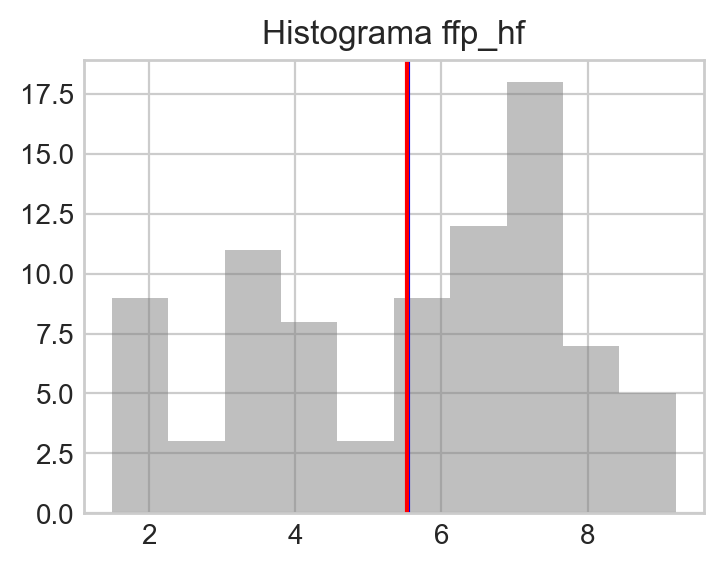

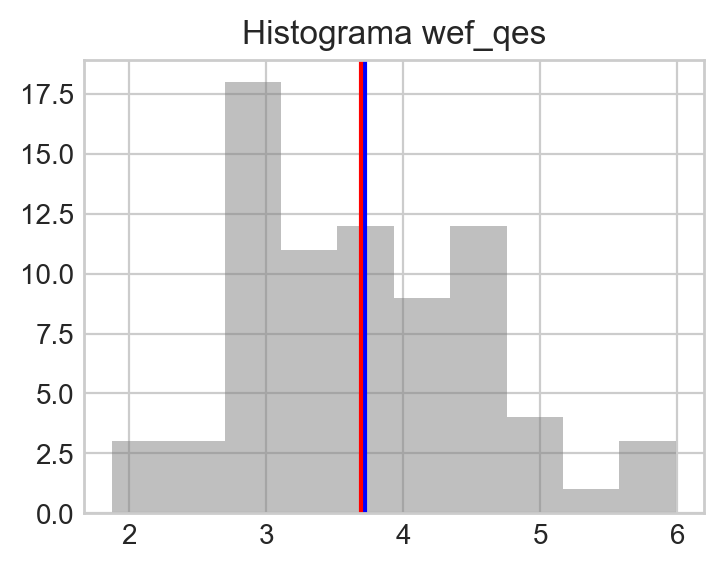

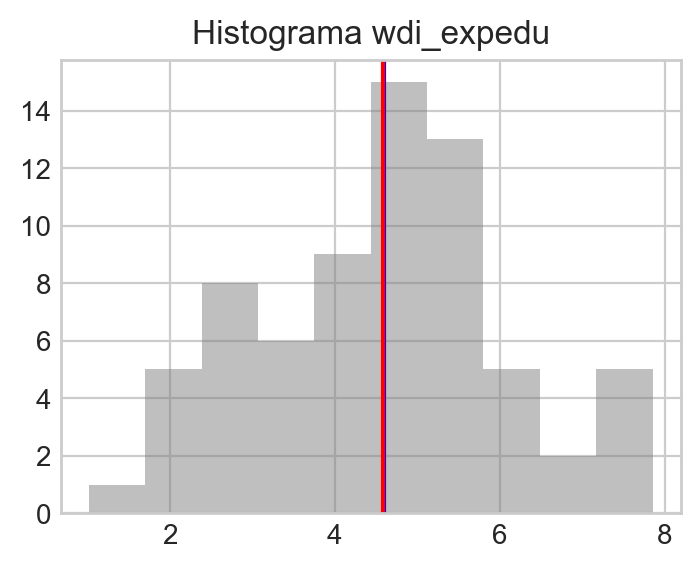

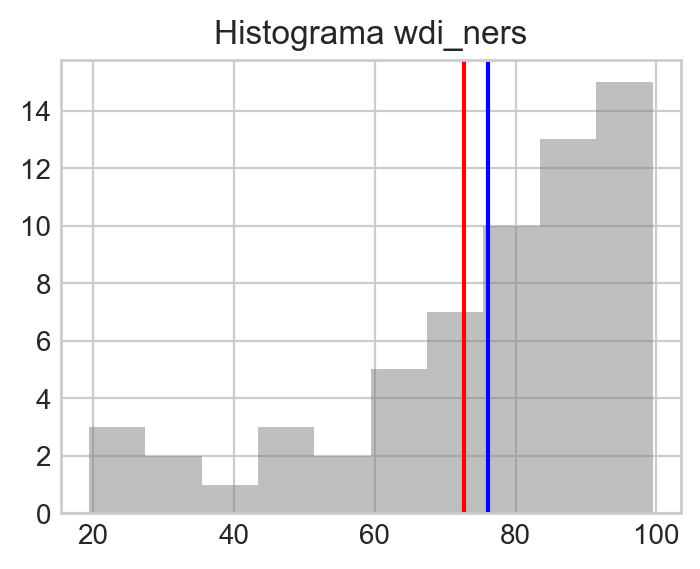

In [8]:
for c in mis_columnas:
    hist_plot(df_frac,df,c,sample_mean=True,true_mean=True)

#### 5. Genere una función que devuelva un dotplot con las medias por región para una variable entregada (2 puntos)
- Cada “punto” del dotplot debe representar la media, o mediana, de una variable para una región específica.
- La función debe contener los siguientes parámetros:
    - dataframe: La tabla de datos donde buscar las variables.
    - plot_var: Corresponde a una columna del dataframe entregado, de la cual se desea obtener la métrica (puede ser media o mediana).
    - plot_by: Corresponde a otra columna del dataframe entregado. Es la columna por la cual se quiere agrupar el dataframe, para acceder luego a la columna entregada en plot_var.
    - statistic: Debe presentar dos opciones; "mean" para la media y "median" para la mediana. Por defecto debe ser "mean".
    - global_stat: Booleano. Si es True, debe graficar la media (o mediana, según lo indicado en statistic) de la variable plot_var entregada, sin agrupar (para todos los datos entregados en dataframe). Por defecto debe ser False.
- Implemente la función en las 3 variables con una menor cantidad de datos perdidos.

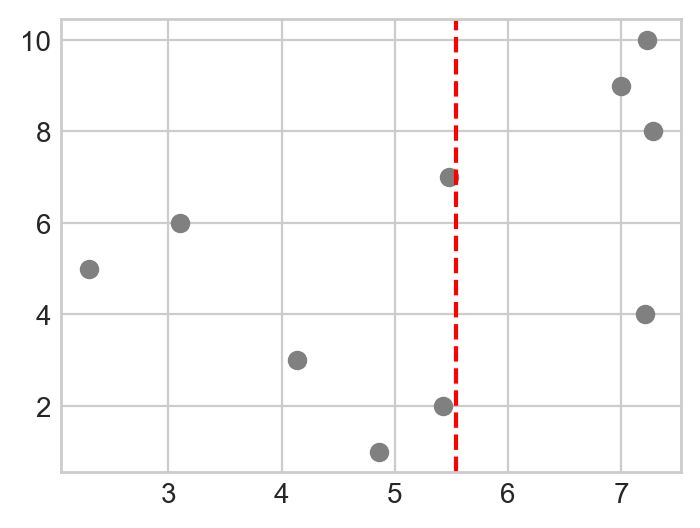

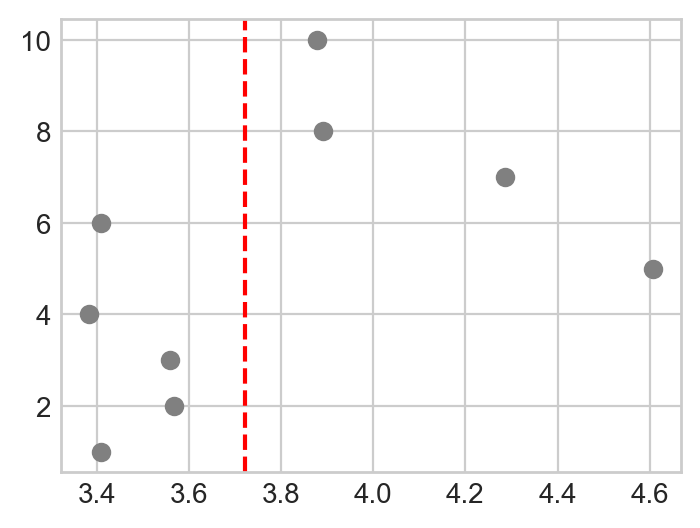

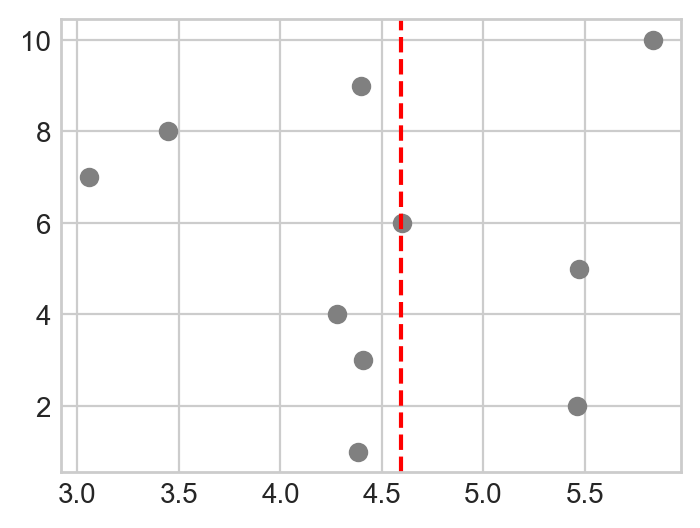

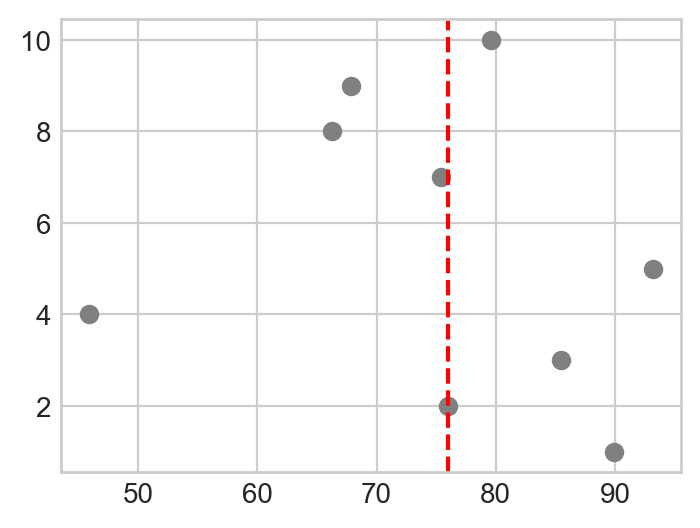

In [9]:
def dotplot(df, plot_var, plot_by = 'ht_region', statistic='mean'):
    tmp = df.loc[:,[plot_var, plot_by]]
    tmp_group = tmp.groupby(plot_by).agg({plot_var:statistic})
    plt.plot(tmp_group.values, tmp_group.index, 'o', color='grey')
    if statistic == 'mean':
        plt.axvline(tmp[plot_var].mean(), color ='red', linestyle='--')
    if statistic == 'median':
        plt.axvline(tmp[plot_var].median(), color ='red', linestyle='--')
    plt.show()

for c in mis_columnas:
    dotplot(df_frac, plot_var=c)

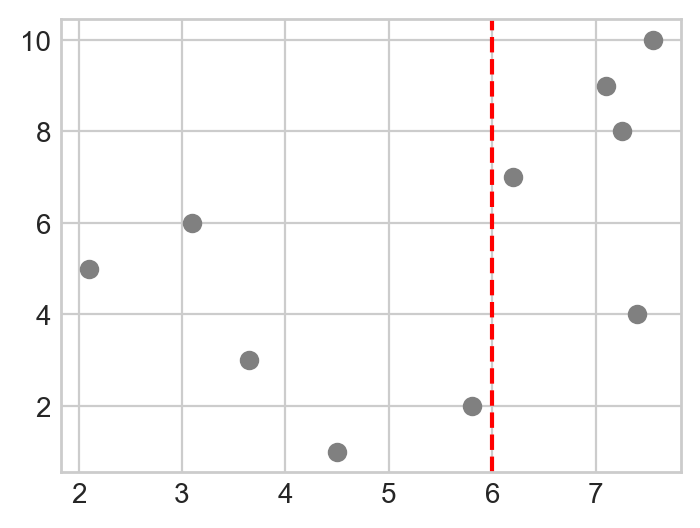

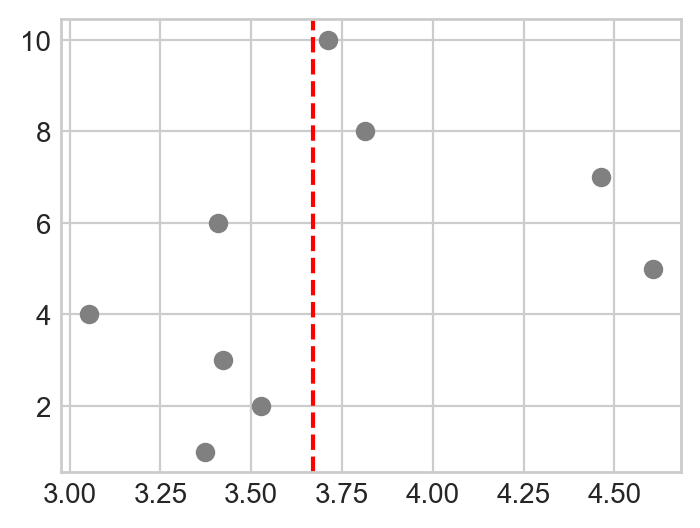

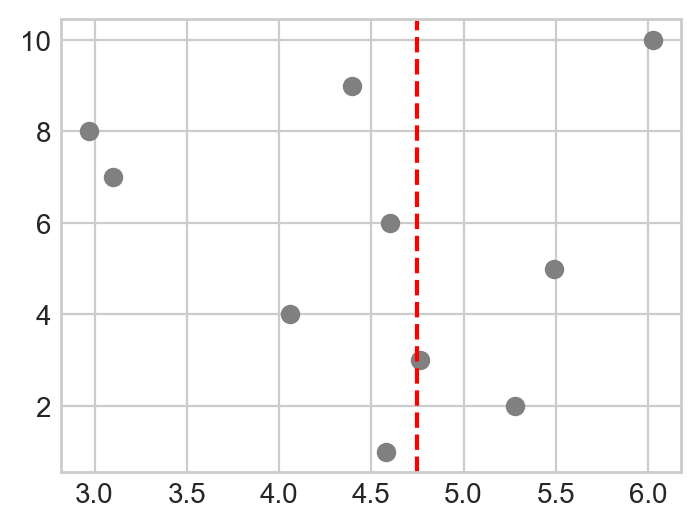

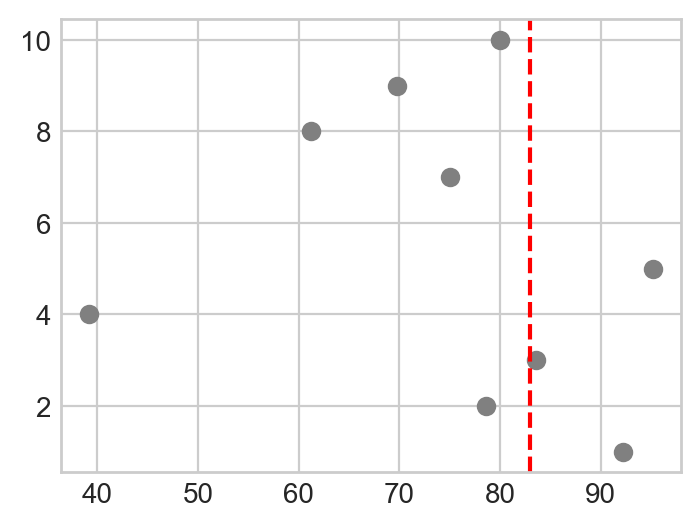

In [10]:
for c in mis_columnas:
    dotplot(df_frac, plot_var=c, statistic='median')

#### 6. Guarde la base de datos (1 punto)
- La submuestra creada tiene un método llamado to_csv. Acceda a este y guarde la base de datos con la siguiente nomenclatura:

***subsample_<iniciales>_demo.csv*** (Subela a la plataforma, junto al desafío)  


In [11]:
ruta = ''
filename = 'subsample_achv_demo.csv'

df_frac.to_csv(ruta+filename)